In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import hddm

/opt/conda/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


In [2]:
# Load data
data = hddm.load_csv('eeg_ddm_StimAllElec_new.csv')
data.rt = data.rt/1000
data.response = 1-data.response
data = hddm.utils.flip_errors(data)
data = data[data['type']=='pain']
data = data[data['race']=='Asian']
data

,subj_idx,outSold,stim,stimulus,type,response,rt,gender,race,frontal_N1,...,FC4_N2,C3_N2,C1_N2,Cz_N2,C2_N2,C4_N2,P7_P1,P8_P1,P7_N170,P8_N170
8,15,low,female,face,pain,1,2.242,female,Asian,-3.189900,...,-1.5396,-3.92840,-5.69910,-0.06058,-2.0446,-0.71452,-0.001598,9.74910,-5.40130,2.37370
9,15,low,female,face,pain,1,1.941,female,Asian,-5.130000,...,-2.5443,3.10690,0.68058,-1.48870,-1.4175,1.05940,-4.266000,1.92080,-6.20120,-0.81359
10,15,low,female,face,pain,1,2.242,female,Asian,-0.061187,...,14.6083,5.84150,9.45640,15.71620,17.7242,20.61500,-3.903800,6.73060,-7.60370,5.69550
11,15,low,female,face,pain,1,2.142,female,Asian,3.732300,...,5.8301,6.99450,5.80640,-2.07740,1.0380,5.71580,-5.843200,-0.46566,0.45153,-0.51832
12,15,low,male,face,pain,1,1.836,female,Asian,-4.493300,...,7.5390,8.94230,8.92460,11.77470,7.9930,4.76680,-1.026300,7.25760,-0.90323,-4.02660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14941,94,high,female,face,pain,0,-1.858,female,Asian,-9.065500,...,-14.2369,-4.03680,-9.62960,-16.27020,-8.5219,-12.24290,3.119100,6.62560,1.02400,-0.53640
14942,94,high,male,face,pain,0,-2.258,female,Asian,7.534700,...,2.8733,-0.08227,3.40070,5.83410,4.6307,10.13290,-10.751200,-2.12590,-13.69270,-3.46820
14943,94,high,male,face,pain,0,-2.359,female,Asian,-6.836500,...,-7.2030,-1.41640,3.96010,2.53660,5.6877,-6.20210,-6.164900,-4.99190,-15.31750,-8.15950
14944,94,high,male,face,pain,0,-1.958,female,Asian,-4.814000,...,-4.5416,3.31360,2.07090,3.70580,-2.1639,-1.71360,1.298000,-2.64930,1.04130,-4.73430


In [3]:
data['aC_P2'] = data[['C1_P2','C2_P2','C3_P2','C4_P2','Cz_P2']].mean(axis=1)
data

,subj_idx,outSold,stim,stimulus,type,response,rt,gender,race,frontal_N1,...,C3_N2,C1_N2,Cz_N2,C2_N2,C4_N2,P7_P1,P8_P1,P7_N170,P8_N170,aC_P2
8,15,low,female,face,pain,1,2.242,female,Asian,-3.189900,...,-3.92840,-5.69910,-0.06058,-2.0446,-0.71452,-0.001598,9.74910,-5.40130,2.37370,4.481380
9,15,low,female,face,pain,1,1.941,female,Asian,-5.130000,...,3.10690,0.68058,-1.48870,-1.4175,1.05940,-4.266000,1.92080,-6.20120,-0.81359,1.053806
10,15,low,female,face,pain,1,2.242,female,Asian,-0.061187,...,5.84150,9.45640,15.71620,17.7242,20.61500,-3.903800,6.73060,-7.60370,5.69550,17.883800
11,15,low,female,face,pain,1,2.142,female,Asian,3.732300,...,6.99450,5.80640,-2.07740,1.0380,5.71580,-5.843200,-0.46566,0.45153,-0.51832,8.462920
12,15,low,male,face,pain,1,1.836,female,Asian,-4.493300,...,8.94230,8.92460,11.77470,7.9930,4.76680,-1.026300,7.25760,-0.90323,-4.02660,10.055660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14941,94,high,female,face,pain,0,-1.858,female,Asian,-9.065500,...,-4.03680,-9.62960,-16.27020,-8.5219,-12.24290,3.119100,6.62560,1.02400,-0.53640,-3.046220
14942,94,high,male,face,pain,0,-2.258,female,Asian,7.534700,...,-0.08227,3.40070,5.83410,4.6307,10.13290,-10.751200,-2.12590,-13.69270,-3.46820,6.486160
14943,94,high,male,face,pain,0,-2.359,female,Asian,-6.836500,...,-1.41640,3.96010,2.53660,5.6877,-6.20210,-6.164900,-4.99190,-15.31750,-8.15950,-1.560524
14944,94,high,male,face,pain,0,-1.958,female,Asian,-4.814000,...,3.31360,2.07090,3.70580,-2.1639,-1.71360,1.298000,-2.64930,1.04130,-4.73430,-0.807640


In [4]:
m_reg_new = hddm.HDDMRegressor(data,
                           "a ~ aC_P2",
                           depends_on={'v': 'race'})
m_reg_new.sample(20000, burn=1000, dbname='db_Ca_P2', db='pickle')
m_reg_new.save('model_Ca_P2')

Adding these covariates:
['a_Intercept', 'a_aC_P2']
 [-----------------100%-----------------] 20001 of 20000 complete in 12330.7 secWARNING: Will not save custom link functions.


In [2]:
m_reg_new = hddm.load('model_Ca_P2')

In [3]:
a_aC_P2 = m_reg_new.nodes_db.node["a_aC_P2"]

P( > 0) =  0.04342105263157895


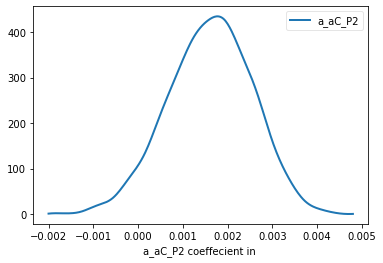

In [4]:
hddm.analyze.plot_posterior_nodes([a_aC_P2], bins=20)
plt.xlabel('a_aC_P2 coeffecient in ')
print("P( > 0) = ", (a_aC_P2.trace() < 0).mean())

In [5]:
(a_aC_P2.trace()).mean()

0.0015968345101676294